### Climate skill at 1&deg;: ENSO correlation coefficients

In [1]:
from collections import namedtuple
from string import ascii_lowercase

import wandb
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
from cartopy import crs as ccrs

from utils import get_beaker_dataset_variables, get_wandb_scalar_metrics, savefig, DPI, FONTSIZE
from constants import INFERENCE_COMPARISON_1DEG, SECONDS_PER_DAY, WANDB_ENTITY, WANDB_PROJECT

In [2]:
EvalVar = namedtuple("EvalVar", ("name", "long_name", "units", "conversion_factor"))

EVAL_VARS = [
    EvalVar("ULWRFtoa", "outgoing longwave radiation", "W/m^2", None),
    EvalVar("PRATEsfc", "surface precipitation", "mm", SECONDS_PER_DAY),
]
DS_VARS = [var.name for var in EVAL_VARS]
SCALAR_METRIC_NAMES = [f'inference/enso_coefficient/rmse/{varname}' for varname in DS_VARS]

In [3]:
datasets = []
metrics = []
wandb_api = wandb.Api()
for duration_name, duration_runs in INFERENCE_COMPARISON_1DEG.items():
    for group_name, group_runs in duration_runs.items():
        for ic_name, ic_run in group_runs.items():
            if "-" in ic_name:
                ic_name = ic_name.split("-")[1]
            full_key = '/'.join([duration_name, group_name, ic_name])
            print(f"Getting dataset for run: {full_key=}")
            ic_dataset = get_beaker_dataset_variables(ic_run, 'enso_coefficient_diagnostics.nc', DS_VARS)
            for var in EVAL_VARS:
                if var.conversion_factor is not None:
                    ic_dataset[var.name] = var.conversion_factor * ic_dataset[var.name]
            datasets.append(
                ic_dataset
                .expand_dims({'duration': [duration_name], 'group': [group_name], 'IC': [ic_name]})
            )
            print(f"Getting scalar metrics for run: {full_key=}")
            wandb_run = wandb_api.run(f"{WANDB_ENTITY}/{WANDB_PROJECT}/{ic_run}")
            run_metrics = get_wandb_scalar_metrics(wandb_run, SCALAR_METRIC_NAMES)
            metrics.append(
                xr.Dataset(run_metrics)
                .expand_dims({'duration': [duration_name], 'group': [group_name], 'IC': [ic_name]})
            )
enso_coefficient_maps = xr.merge(datasets).squeeze()
enso_coefficient_metrics = xr.merge(metrics)

Getting dataset for run: full_key='10yr/ACE2-ERA5/IC0'


/home/brianh/miniconda3/envs/ace2-paper/lib/python3.10/site-packages/beaker/util.py:25: RuntimeWarning: Found unknown field 'environments: 0' for data model 'WorkspaceSize'. This may be a newly added field that hasn't been defined in beaker-py yet. Please submit an issue report about this here:
https://github.com/allenai/beaker-py/issues/new?assignees=&labels=bug&template=bug_report.yml
  warnings.warn(


Output()

Getting scalar metrics for run: full_key='10yr/ACE2-ERA5/IC0'
Getting dataset for run: full_key='10yr/ACE2-ERA5/IC1'


Output()

Getting scalar metrics for run: full_key='10yr/ACE2-ERA5/IC1'
Getting dataset for run: full_key='10yr/ACE2-ERA5/IC2'


Output()

Getting scalar metrics for run: full_key='10yr/ACE2-ERA5/IC2'
Getting dataset for run: full_key='10yr/ACE2-SHiELD/IC0'


Output()

Getting scalar metrics for run: full_key='10yr/ACE2-SHiELD/IC0'
Getting dataset for run: full_key='10yr/ACE2-SHiELD/IC1'


Output()

Getting scalar metrics for run: full_key='10yr/ACE2-SHiELD/IC1'
Getting dataset for run: full_key='10yr/ACE2-SHiELD/IC2'


Output()

Getting scalar metrics for run: full_key='10yr/ACE2-SHiELD/IC2'
Getting dataset for run: full_key='10yr/ACE2-SHiELD-RS0/IC0'


Output()

Getting scalar metrics for run: full_key='10yr/ACE2-SHiELD-RS0/IC0'
Getting dataset for run: full_key='10yr/ACE2-SHiELD-RS0/IC1'


Output()

Getting scalar metrics for run: full_key='10yr/ACE2-SHiELD-RS0/IC1'
Getting dataset for run: full_key='10yr/ACE2-SHiELD-RS0/IC2'


Output()

Getting scalar metrics for run: full_key='10yr/ACE2-SHiELD-RS0/IC2'
Getting dataset for run: full_key='10yr/ACE2-SHiELD-RS1/IC0'


Output()

Getting scalar metrics for run: full_key='10yr/ACE2-SHiELD-RS1/IC0'
Getting dataset for run: full_key='10yr/ACE2-SHiELD-RS1/IC1'


Output()

Getting scalar metrics for run: full_key='10yr/ACE2-SHiELD-RS1/IC1'
Getting dataset for run: full_key='10yr/ACE2-SHiELD-RS1/IC2'


Output()

Getting scalar metrics for run: full_key='10yr/ACE2-SHiELD-RS1/IC2'
Getting dataset for run: full_key='10yr/ACE2-SHiELD-RS3/IC0'


Output()

Getting scalar metrics for run: full_key='10yr/ACE2-SHiELD-RS3/IC0'
Getting dataset for run: full_key='10yr/ACE2-SHiELD-RS3/IC1'


Output()

Getting scalar metrics for run: full_key='10yr/ACE2-SHiELD-RS3/IC1'
Getting dataset for run: full_key='10yr/ACE2-SHiELD-RS3/IC2'


Output()

Getting scalar metrics for run: full_key='10yr/ACE2-SHiELD-RS3/IC2'
Getting dataset for run: full_key='10yr/SHiELD-reference/IC0'


Output()

Getting scalar metrics for run: full_key='10yr/SHiELD-reference/IC0'
Getting dataset for run: full_key='10yr/SHiELD-reference/IC1'


Output()

Getting scalar metrics for run: full_key='10yr/SHiELD-reference/IC1'
Getting dataset for run: full_key='10yr/SHiELD-reference/IC2'


Output()

Getting scalar metrics for run: full_key='10yr/SHiELD-reference/IC2'
Getting dataset for run: full_key='10yr/SHiELD-reference/IC3'


Output()

Getting scalar metrics for run: full_key='10yr/SHiELD-reference/IC3'
Getting dataset for run: full_key='10yr/SHiELD-reference/IC4'


Output()

Getting scalar metrics for run: full_key='10yr/SHiELD-reference/IC4'
Getting dataset for run: full_key='10yr/SHiELD-reference/IC5'


Output()

Getting scalar metrics for run: full_key='10yr/SHiELD-reference/IC5'
Getting dataset for run: full_key='10yr/SHiELD-reference/IC6'


Output()

Getting scalar metrics for run: full_key='10yr/SHiELD-reference/IC6'
Getting dataset for run: full_key='10yr/SHiELD-reference/IC7'


Output()

Getting scalar metrics for run: full_key='10yr/SHiELD-reference/IC7'
Getting dataset for run: full_key='10yr/ACE-climSST/IC0'


Output()

Getting scalar metrics for run: full_key='10yr/ACE-climSST/IC0'
Getting dataset for run: full_key='10yr/ACE-climSST/IC1'


Output()

Getting scalar metrics for run: full_key='10yr/ACE-climSST/IC1'
Getting dataset for run: full_key='10yr/ACE-climSST/IC2'


Output()

Getting scalar metrics for run: full_key='10yr/ACE-climSST/IC2'
Getting dataset for run: full_key='10yr/SHiELD-vs.-ERA5/IC0'


Output()

Getting scalar metrics for run: full_key='10yr/SHiELD-vs.-ERA5/IC0'
Getting dataset for run: full_key='10yr/SHiELD-vs.-ERA5/IC1'


Output()

Getting scalar metrics for run: full_key='10yr/SHiELD-vs.-ERA5/IC1'
Getting dataset for run: full_key='81yr/ACE2-ERA5/IC0'


Output()

Getting scalar metrics for run: full_key='81yr/ACE2-ERA5/IC0'
Getting dataset for run: full_key='81yr/ACE2-ERA5/IC1'


Output()

Getting scalar metrics for run: full_key='81yr/ACE2-ERA5/IC1'
Getting dataset for run: full_key='81yr/ACE2-ERA5/IC2'


Output()

Getting scalar metrics for run: full_key='81yr/ACE2-ERA5/IC2'
Getting dataset for run: full_key='81yr/ACE2-SHiELD/IC0'


Output()

Getting scalar metrics for run: full_key='81yr/ACE2-SHiELD/IC0'
Getting dataset for run: full_key='81yr/ACE2-SHiELD/IC1'


Output()

Getting scalar metrics for run: full_key='81yr/ACE2-SHiELD/IC1'
Getting dataset for run: full_key='81yr/ACE2-SHiELD/IC2'


Output()

Getting scalar metrics for run: full_key='81yr/ACE2-SHiELD/IC2'
Getting dataset for run: full_key='81yr/ACE2-SHiELD-RS0/IC0'


Output()

Getting scalar metrics for run: full_key='81yr/ACE2-SHiELD-RS0/IC0'
Getting dataset for run: full_key='81yr/ACE2-SHiELD-RS0/IC1'


Output()

Getting scalar metrics for run: full_key='81yr/ACE2-SHiELD-RS0/IC1'
Getting dataset for run: full_key='81yr/ACE2-SHiELD-RS0/IC2'


Output()

Getting scalar metrics for run: full_key='81yr/ACE2-SHiELD-RS0/IC2'
Getting dataset for run: full_key='81yr/ACE2-SHiELD-RS1/IC0'


Output()

Getting scalar metrics for run: full_key='81yr/ACE2-SHiELD-RS1/IC0'
Getting dataset for run: full_key='81yr/ACE2-SHiELD-RS1/IC1'


Output()

Getting scalar metrics for run: full_key='81yr/ACE2-SHiELD-RS1/IC1'
Getting dataset for run: full_key='81yr/ACE2-SHiELD-RS1/IC2'


Output()

Getting scalar metrics for run: full_key='81yr/ACE2-SHiELD-RS1/IC2'
Getting dataset for run: full_key='81yr/ACE2-SHiELD-RS3/IC0'


Output()

Getting scalar metrics for run: full_key='81yr/ACE2-SHiELD-RS3/IC0'
Getting dataset for run: full_key='81yr/ACE2-SHiELD-RS3/IC1'


Output()

Getting scalar metrics for run: full_key='81yr/ACE2-SHiELD-RS3/IC1'
Getting dataset for run: full_key='81yr/ACE2-SHiELD-RS3/IC2'


Output()

Getting scalar metrics for run: full_key='81yr/ACE2-SHiELD-RS3/IC2'
Getting dataset for run: full_key='81yr/SHiELD-reference/IC0'


Output()

Getting scalar metrics for run: full_key='81yr/SHiELD-reference/IC0'
Getting dataset for run: full_key='81yr/ACE-climSST/IC0'


Output()

Getting scalar metrics for run: full_key='81yr/ACE-climSST/IC0'
Getting dataset for run: full_key='81yr/ACE-climSST/IC1'


Output()

Getting scalar metrics for run: full_key='81yr/ACE-climSST/IC1'
Getting dataset for run: full_key='81yr/ACE-climSST/IC2'


Output()

Getting scalar metrics for run: full_key='81yr/ACE-climSST/IC2'
Getting dataset for run: full_key='81yr/SHiELD-vs.-ERA5/IC0'


Output()

Getting scalar metrics for run: full_key='81yr/SHiELD-vs.-ERA5/IC0'
Getting dataset for run: full_key='81yr/SHiELD-vs.-ERA5/IC1'


Output()

Getting scalar metrics for run: full_key='81yr/SHiELD-vs.-ERA5/IC1'


In [4]:
plt.rc('font', size=FONTSIZE)
plt.rc('axes', titlesize=FONTSIZE)
plt.rc('figure', dpi=DPI)

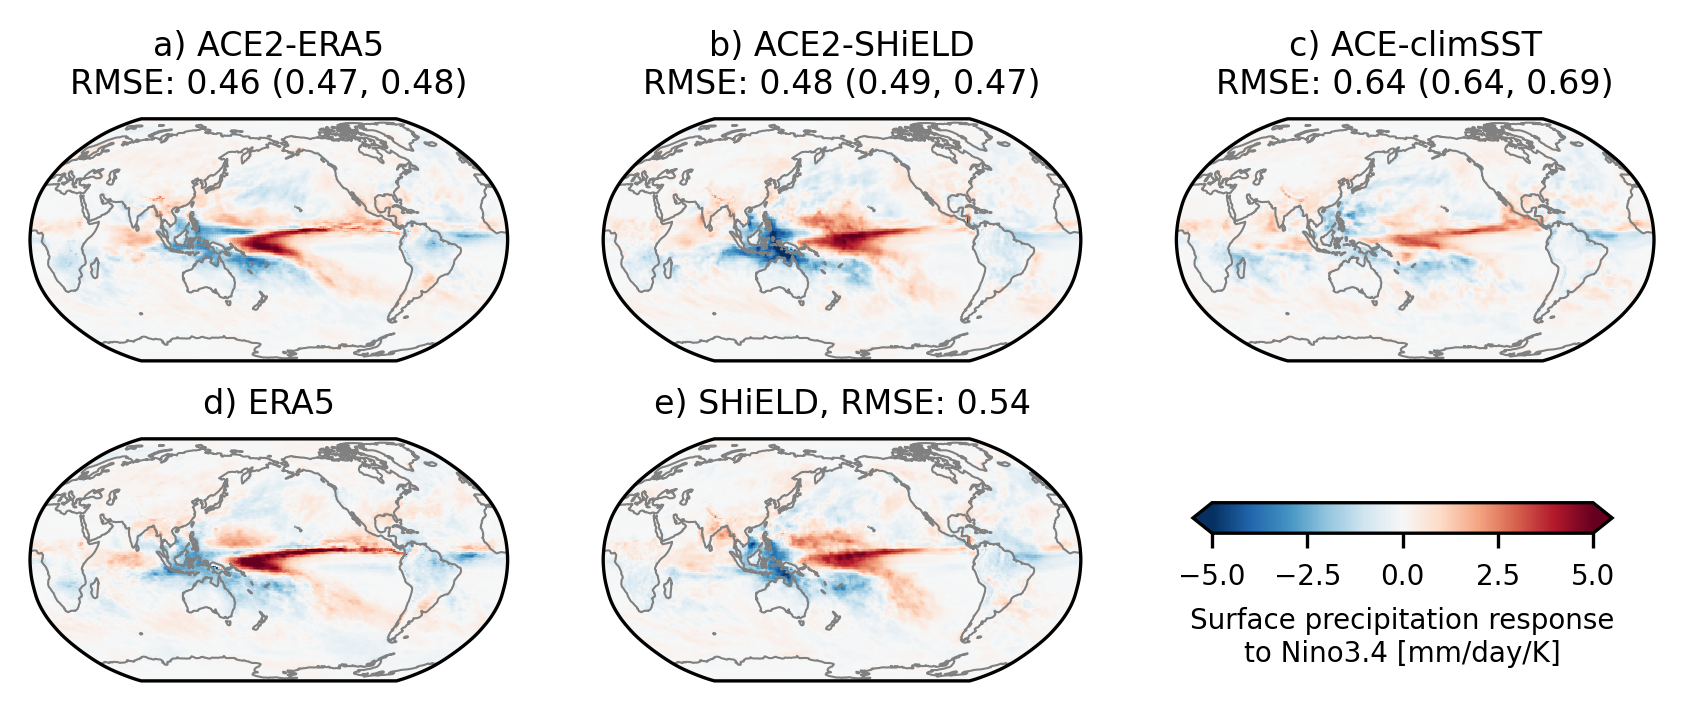

In [5]:
plot_var = 'PRATEsfc'
cbar_label = 'Surface precipitation response\nto Nino3.4 [mm/day/K]'
duration = '10yr'
var_scale = 5
plot_kwargs = dict(vmin=-var_scale, vmax=var_scale, cmap='RdBu_r')
metric_var = f'inference/enso_coefficient/rmse/{plot_var}'
metric_da = (SECONDS_PER_DAY * enso_coefficient_metrics[metric_var])
fmt = '0.2f'
figsize = [1.27 * dim for dim in [5.5, 2.0]] # should be [5.5, 2.0], but need to scale up for unknown font size reasons

fig, axes = plt.subplots(
    2,
    3, 
    subplot_kw=dict(projection=ccrs.Robinson(central_longitude=180)),
    figsize=figsize,
    dpi=DPI,
)
ax0 = axes[0, 0]
h = enso_coefficient_maps[plot_var].sel(
    IC='IC0', duration=duration, source='prediction', group='ACE2-ERA5'
).plot(ax=ax0, transform=ccrs.PlateCarree(), add_colorbar=False, **plot_kwargs)
ax0_rmse = metric_da.sel(duration=duration, group='ACE2-ERA5')
ax0.set_title(f'{ascii_lowercase[0]}) ACE2-ERA5\nRMSE: {ax0_rmse.sel(IC="IC0").item():{fmt}} ({ax0_rmse.sel(IC="IC1").item():{fmt}}, {ax0_rmse.sel(IC="IC2").item():{fmt}})')
ax1 = axes[0, 1]
enso_coefficient_maps[plot_var].sel(
    IC='IC0', duration=duration, source='prediction', group='ACE2-SHiELD'
).plot(ax=ax1, transform=ccrs.PlateCarree(), add_colorbar=False, **plot_kwargs)
ax1_rmse = metric_da.sel(duration=duration, group='ACE2-SHiELD')
ax1.set_title(f'{ascii_lowercase[1]}) ACE2-SHiELD\nRMSE: {ax1_rmse.sel(IC="IC0").item():{fmt}} ({ax1_rmse.sel(IC="IC1").item():{fmt}}, {ax1_rmse.sel(IC="IC2").item():{fmt}})')
ax2 = axes[0, 2]
enso_coefficient_maps[plot_var].sel(
    IC='IC0', duration=duration, source='prediction', group='ACE-climSST'
).plot(ax=ax2, transform=ccrs.PlateCarree(), add_colorbar=False, **plot_kwargs)
ax2_rmse = metric_da.sel(duration=duration, group='ACE-climSST')
ax2.set_title(f'{ascii_lowercase[2]}) ACE-climSST\nRMSE: {ax2_rmse.sel(IC="IC0").item():{fmt}} ({ax2_rmse.sel(IC="IC1").item():{fmt}}, {ax2_rmse.sel(IC="IC2").item():{fmt}})')
ax3 = axes[1, 0]
enso_coefficient_maps[plot_var].sel(
    IC='IC0', duration=duration, source='target', group='ACE2-ERA5'
).plot(ax=ax3, transform=ccrs.PlateCarree(), add_colorbar=False, **plot_kwargs)
ax3.set_title(f'{ascii_lowercase[3]}) ERA5')
ax4 = axes[1, 1]
enso_coefficient_maps[plot_var].sel(
    IC='IC0', duration=duration, source='target', group='ACE2-SHiELD'
).plot(ax=ax4, transform=ccrs.PlateCarree(), add_colorbar=False, **plot_kwargs)
# note that IC6 of the reference ensemble corresponds to the 2001-2010 ACE period
ax4_rmse = metric_da.sel(duration=duration, IC='IC6', group='SHiELD-reference')
ax4.set_title(f'{ascii_lowercase[4]}) SHiELD, RMSE: {ax4_rmse.item():{fmt}}')
[ax.coastlines(color='gray', lw=0.5) for ax in axes.flatten()[:-1]]
ax5 = axes[1, 2]
ax5.set_axis_off()
del ax5
ax5 = fig.add_axes([0.68, 0.32, 0.2, 0.04])
cb = fig.colorbar(
    h,
    cax=ax5,
    orientation='horizontal',
    extend='both',
    ticks=np.linspace(-var_scale, var_scale, 5),
)
cb.set_label(cbar_label, fontsize='small')
ax5.tick_params(labelsize='small')
savefig(fig, f'climate_skill_1deg_enso_coefficient_maps_{plot_var}.png')

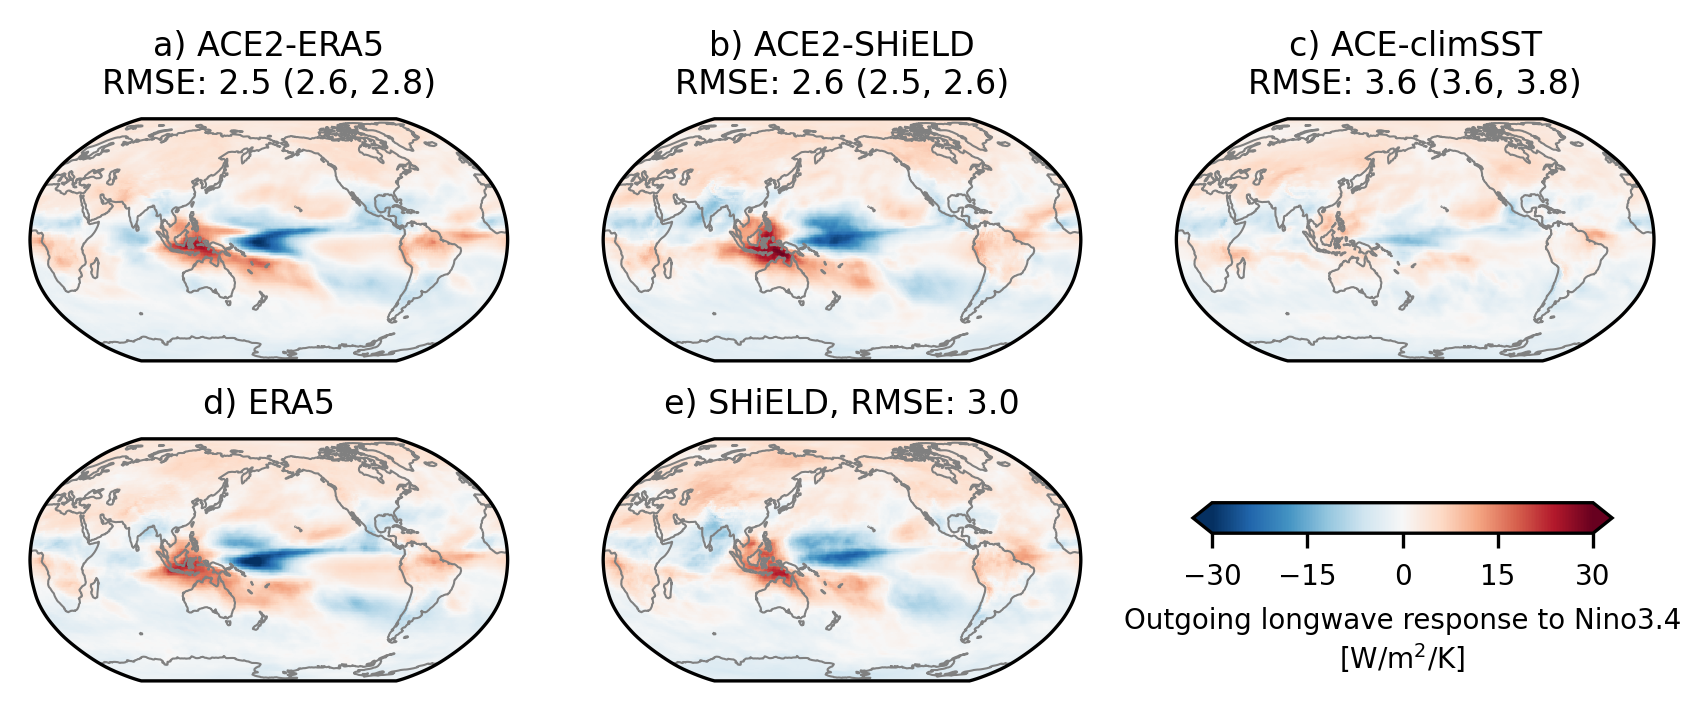

In [6]:
plot_var = 'ULWRFtoa'
cbar_label = 'Outgoing longwave response to Nino3.4\n' + r'[W/m$^2$/K]'
duration = '10yr'
var_scale = 30
metric_var = f'inference/enso_coefficient/rmse/{plot_var}'
metric_da = enso_coefficient_metrics[metric_var]
plot_kwargs = dict(vmin=-var_scale, vmax=var_scale, cmap='RdBu_r')
fmt = '0.1f'

fig, axes = plt.subplots(
    2,
    3, 
    subplot_kw=dict(projection=ccrs.Robinson(central_longitude=180)),
    figsize=figsize,
    dpi=DPI,
)
ax0 = axes[0, 0]
h = enso_coefficient_maps[plot_var].sel(
    IC='IC0', duration=duration, source='prediction', group='ACE2-ERA5'
).plot(ax=ax0, transform=ccrs.PlateCarree(), add_colorbar=False, **plot_kwargs)
ax0_rmse = metric_da.sel(duration=duration, group='ACE2-ERA5')
ax0.set_title(f'{ascii_lowercase[0]}) ACE2-ERA5\nRMSE: {ax0_rmse.sel(IC="IC0").item():{fmt}} ({ax0_rmse.sel(IC="IC1").item():{fmt}}, {ax0_rmse.sel(IC="IC2").item():{fmt}})')
ax1 = axes[0, 1]
enso_coefficient_maps[plot_var].sel(
    IC='IC0', duration=duration, source='prediction', group='ACE2-SHiELD'
).plot(ax=ax1, transform=ccrs.PlateCarree(), add_colorbar=False, **plot_kwargs)
ax1_rmse = metric_da.sel(duration=duration, group='ACE2-SHiELD')
ax1.set_title(f'{ascii_lowercase[1]}) ACE2-SHiELD\nRMSE: {ax1_rmse.sel(IC="IC0").item():{fmt}} ({ax1_rmse.sel(IC="IC1").item():{fmt}}, {ax1_rmse.sel(IC="IC2").item():{fmt}})')
ax2 = axes[0, 2]
enso_coefficient_maps[plot_var].sel(
    IC='IC0', duration=duration, source='prediction', group='ACE-climSST'
).plot(ax=ax2, transform=ccrs.PlateCarree(), add_colorbar=False, **plot_kwargs)
ax2_rmse = metric_da.sel(duration=duration, group='ACE-climSST')
ax2.set_title(f'{ascii_lowercase[2]}) ACE-climSST\nRMSE: {ax2_rmse.sel(IC="IC0").item():{fmt}} ({ax2_rmse.sel(IC="IC1").item():{fmt}}, {ax2_rmse.sel(IC="IC2").item():{fmt}})')
ax3 = axes[1, 0]
enso_coefficient_maps[plot_var].sel(
    IC='IC0', duration=duration, source='target', group='ACE2-ERA5'
).plot(ax=ax3, transform=ccrs.PlateCarree(), add_colorbar=False, **plot_kwargs)
ax3.set_title(f'{ascii_lowercase[3]}) ERA5')
ax4 = axes[1, 1]
enso_coefficient_maps[plot_var].sel(
    IC='IC0', duration=duration, source='target', group='ACE2-SHiELD'
).plot(ax=ax4, transform=ccrs.PlateCarree(), add_colorbar=False, **plot_kwargs)
# note that IC6 of the reference ensemble corresponds to the 2001-2010 ACE period
ax4_rmse = metric_da.sel(duration=duration, IC='IC6', group='SHiELD-reference')
ax4.set_title(f'{ascii_lowercase[4]}) SHiELD, RMSE: {ax4_rmse.item():{fmt}}')
[ax.coastlines(color='gray', lw=0.5) for ax in axes.flatten()[:-1]]
ax5 = axes[1, 2]
ax5.set_axis_off()
del ax5
ax5 = fig.add_axes([0.68, 0.32, 0.2, 0.04])
cb = fig.colorbar(
    h,
    cax=ax5,
    orientation='horizontal',
    extend='both',
    ticks=np.linspace(-var_scale, var_scale, 5),
    label=cbar_label
)
cb.set_label(cbar_label, fontsize='small')
ax5.tick_params(labelsize='small')
savefig(fig, f'climate_skill_1deg_enso_coefficient_maps_{plot_var}.png')